Suppose that your business relies on computing services where the power consumed by your machines varies throughout the day. You do not know the actual cost of the electricity consumed by the machines throughout the day, but the organization has provided you with historical data of the price of the electricity consumed by the machines.

1. DateTime: Date and time of the record
2. Holiday: contains the name of the holiday if the day is a national holiday
3. HolidayFlag: contains 1 if it’s a bank holiday otherwise 0
4. DayOfWeek: contains values between 0-6 where 0 is Monday
5. WeekOfYear: week of the year
6. Day: Day of the date
7. Month: Month of the date
8. Year: Year of the date
9. PeriodOfDay: half-hour period of the day
10. ForcastWindProduction: forecasted wind production
11. SystemLoadEA forecasted national load
12. SMPEA: forecasted price
13. ORKTemperature: actual temperature measured
14. ORKWindspeed: actual windspeed measured
15. CO2Intensity: actual C02 intensity for the electricity produced
16. ActualWindProduction: actual wind energy production
17. SystemLoadEP2: actual national system load
18. SMPEP2: the actual price of the electricity consumed (labels or values to be predicted)

train a machine learning model to predict the price of electricity consumed by the machines.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("electricity.csv", low_memory= False)
df.head()

,DateTime,Holiday,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
0,01/11/2011 00:00,None,0,1,44,1,11,2011,0,315.31,3388.77,49.26,6.00,9.30,600.71,356.00,3159.60,54.32
1,01/11/2011 00:30,None,0,1,44,1,11,2011,1,321.80,3196.66,49.26,6.00,11.10,605.42,317.00,2973.01,54.23
2,01/11/2011 01:00,None,0,1,44,1,11,2011,2,328.57,3060.71,49.10,5.00,11.10,589.97,311.00,2834.00,54.23
3,01/11/2011 01:30,None,0,1,44,1,11,2011,3,335.60,2945.56,48.04,6.00,9.30,585.94,313.00,2725.99,53.47
4,01/11/2011 02:00,None,0,1,44,1,11,2011,4,342.90,2849.34,33.75,6.00,11.10,571.52,346.00,2655.64,39.87


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38014 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   DateTime                38014 non-null  object
 1   Holiday                 38014 non-null  object
 2   HolidayFlag             38014 non-null  int64 
 3   DayOfWeek               38014 non-null  int64 
 4   WeekOfYear              38014 non-null  int64 
 5   Day                     38014 non-null  int64 
 6   Month                   38014 non-null  int64 
 7   Year                    38014 non-null  int64 
 8   PeriodOfDay             38014 non-null  int64 
 9   ForecastWindProduction  38014 non-null  object
 10  SystemLoadEA            38014 non-null  object
 11  SMPEA                   38014 non-null  object
 12  ORKTemperature          38014 non-null  object
 13  ORKWindspeed            38014 non-null  object
 14  CO2Intensity            38014 non-null  object
 15  Ac

In [4]:
df.describe()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay
count,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000,38014.000000
mean,0.040406,2.997317,28.124586,15.739412,6.904246,2012.383859,23.501105
std,0.196912,1.999959,15.587575,8.804247,3.573696,0.624956,13.853108
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000
25%,0.000000,1.000000,15.000000,8.000000,4.000000,2012.000000,12.000000
50%,0.000000,3.000000,29.000000,16.000000,7.000000,2012.000000,24.000000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,35.750000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000


In [5]:
df.shape

(38014, 18)

In [6]:
# check for missing values
df.isna().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

In [7]:
# view unique values of object dtype variables
def print_unique(df):
    for column in df:
        if df[column].dtypes == "object":
            print(f'{column}: {df[column].unique()}')

In [8]:
print_unique(df)

DateTime: ['01/11/2011 00:00' '01/11/2011 00:30' '01/11/2011 01:00' ...
 '31/12/2013 22:30' '31/12/2013 23:00' '31/12/2013 23:30']
Holiday: ['None' 'Christmas Eve' 'Christmas' "St Stephen's Day" "New Year's Eve"
 "New Year's Day" "St Patrick's Day" 'Good Friday' 'Holy Saturday'
 'Easter' 'Easter Monday' 'May Day' 'June Bank Holiday'
 'August Bank Holiday' 'October Bank Holiday']
ForecastWindProduction: ['315.31' '321.80' '328.57' ... '1152.01' '1123.67' '1094.24']
SystemLoadEA: ['3388.77' '3196.66' '3060.71' ... '3821.44' '3724.21' '3638.16']
SMPEA: ['49.26' '49.10' '48.04' ... '74.84' '149.77' '160.43']
ORKTemperature: ['6.00' '5.00' '4.00' '8.00' '9.00' '?' '11.00' '12.00' '13.00' '10.00'
 '7.00' '3.00' '14.00' '2.00' '1.00' '0.00' '-1.00' '15.00' '16.00'
 '17.00' '18.00' '19.00' '20.00' '21.00' '22.00' '-2.00' '-3.00' '-4.00'
 '23.00' '24.00' '25.00' '-0.00']
ORKWindspeed: ['9.30' '11.10' '7.40' '5.60' '3.70' '?' '13.00' '22.20' '18.50' '20.40'
 '24.10' '25.90' '27.80' '31.50' '29.6

some numerical values are recorded as object type

convert them to float

In [9]:
df.dtypes

DateTime                  object
Holiday                   object
HolidayFlag                int64
DayOfWeek                  int64
WeekOfYear                 int64
Day                        int64
Month                      int64
Year                       int64
PeriodOfDay                int64
ForecastWindProduction    object
SystemLoadEA              object
SMPEA                     object
ORKTemperature            object
ORKWindspeed              object
CO2Intensity              object
ActualWindProduction      object
SystemLoadEP2             object
SMPEP2                    object
dtype: object

In [10]:
import pandas as pd

def change_dtype(df, exclude, inplace=False):
    """
    Converts columns of type 'object' to numeric data types in a pandas DataFrame, excluding specified columns.

    Parameters:
        df (pandas.DataFrame): The input DataFrame.
        exclude (list of str): The names of columns to exclude from the operation.
        inplace (bool): Whether to modify the input DataFrame directly. Default is False.

    Returns:
        pandas.DataFrame or None: If inplace=True, returns None. Otherwise, returns a new DataFrame with the modified columns.
    """
    if inplace:
        for col in df.columns:
            if col not in exclude and df[col].dtype == "object":
                df[col] = pd.to_numeric(df[col], errors="coerce")
    else:
        new_df = df.copy()
        for col in new_df.columns:
            if col not in exclude and new_df[col].dtype == "object":
                new_df[col] = pd.to_numeric(new_df[col], errors="coerce")
        return new_df


In [11]:
df1 = change_dtype(df, ['DateTime', 'Holiday'])


In [12]:
df1.dtypes

DateTime                   object
Holiday                    object
HolidayFlag                 int64
DayOfWeek                   int64
WeekOfYear                  int64
Day                         int64
Month                       int64
Year                        int64
PeriodOfDay                 int64
ForecastWindProduction    float64
SystemLoadEA              float64
SMPEA                     float64
ORKTemperature            float64
ORKWindspeed              float64
CO2Intensity              float64
ActualWindProduction      float64
SystemLoadEP2             float64
SMPEP2                    float64
dtype: object

In [13]:
# check for missing values
df1.isna().sum()

DateTime                    0
Holiday                     0
HolidayFlag                 0
DayOfWeek                   0
WeekOfYear                  0
Day                         0
Month                       0
Year                        0
PeriodOfDay                 0
ForecastWindProduction      5
SystemLoadEA                2
SMPEA                       2
ORKTemperature            295
ORKWindspeed              299
CO2Intensity                7
ActualWindProduction        5
SystemLoadEP2               2
SMPEP2                      2
dtype: int64

In [14]:
df1 = df1.dropna()

In [18]:
df1.isna().sum()

DateTime                  0
Holiday                   0
HolidayFlag               0
DayOfWeek                 0
WeekOfYear                0
Day                       0
Month                     0
Year                      0
PeriodOfDay               0
ForecastWindProduction    0
SystemLoadEA              0
SMPEA                     0
ORKTemperature            0
ORKWindspeed              0
CO2Intensity              0
ActualWindProduction      0
SystemLoadEP2             0
SMPEP2                    0
dtype: int64

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37682 entries, 0 to 38013
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DateTime                37682 non-null  object 
 1   Holiday                 37682 non-null  object 
 2   HolidayFlag             37682 non-null  int64  
 3   DayOfWeek               37682 non-null  int64  
 4   WeekOfYear              37682 non-null  int64  
 5   Day                     37682 non-null  int64  
 6   Month                   37682 non-null  int64  
 7   Year                    37682 non-null  int64  
 8   PeriodOfDay             37682 non-null  int64  
 9   ForecastWindProduction  37682 non-null  float64
 10  SystemLoadEA            37682 non-null  float64
 11  SMPEA                   37682 non-null  float64
 12  ORKTemperature          37682 non-null  float64
 13  ORKWindspeed            37682 non-null  float64
 14  CO2Intensity            37682 non-null

In [16]:
df1.describe()

,HolidayFlag,DayOfWeek,WeekOfYear,Day,Month,Year,PeriodOfDay,ForecastWindProduction,SystemLoadEA,SMPEA,ORKTemperature,ORKWindspeed,CO2Intensity,ActualWindProduction,SystemLoadEP2,SMPEP2
count,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000,37682.000000
mean,0.037578,2.998355,28.044584,15.707181,6.886789,2012.386577,23.508651,542.871513,4020.753657,62.747428,9.628443,19.209721,479.519761,519.814951,3787.560062,64.181344
std,0.190175,1.998845,15.552428,8.804424,3.566915,0.623780,13.854822,413.725304,860.148265,32.300069,4.439757,9.569069,85.170896,377.879680,842.544909,35.432265
min,0.000000,0.000000,1.000000,1.000000,1.000000,2011.000000,0.000000,0.680000,2183.940000,0.000000,-4.000000,0.000000,0.000000,1.000000,1809.960000,-47.740000
25%,0.000000,1.000000,14.000000,8.000000,4.000000,2012.000000,12.000000,188.927500,3281.780000,45.540000,6.000000,13.000000,421.275000,198.000000,3060.215000,45.800000
50%,0.000000,3.000000,29.000000,16.000000,7.000000,2012.000000,24.000000,440.645000,4105.530000,55.230000,9.000000,18.500000,480.350000,444.000000,3867.220000,55.560000
75%,0.000000,5.000000,43.000000,23.000000,10.000000,2013.000000,36.000000,837.182500,4638.982500,70.320000,13.000000,24.100000,537.540000,792.000000,4427.822500,72.120000
max,1.000000,6.000000,52.000000,31.000000,12.000000,2013.000000,47.000000,1680.000000,6492.910000,587.580000,25.000000,75.900000,842.880000,1769.000000,6309.750000,1000.000000


In [25]:
df1.Holiday.unique()

array(['None', 'Christmas Eve', 'Christmas', "St Stephen's Day",
       "New Year's Eve", "New Year's Day", "St Patrick's Day",
       'Good Friday', 'Holy Saturday', 'Easter', 'Easter Monday',
       'May Day', 'June Bank Holiday', 'August Bank Holiday',
       'October Bank Holiday'], dtype=object)

In [26]:
df1.HolidayFlag.unique()

array([0, 1], dtype=int64)

we might be interested in checking if our dataset has ouliers, to do this we'll use a boxplot


In [20]:
import matplotlib.pyplot as plt

def box_plot(df):
    num_cols = df.select_dtypes(include= ['int64', 'float64']).columns.tolist()
    n = len(num_cols)
    fig, axes = plt.subplots(nrows= 1, ncols= n, figsize= (4*n, 4))
    for i, col in enumerate(num_cols):
        ax = axes[i] if n > 1 else axes
        ax.boxplot(df[col], vert= False, whis= 1.5, labels= [col])
        ax.set_title(col)

    plt.tight_layout()
    plt.show()

In [22]:
df1.shape

(37682, 18)

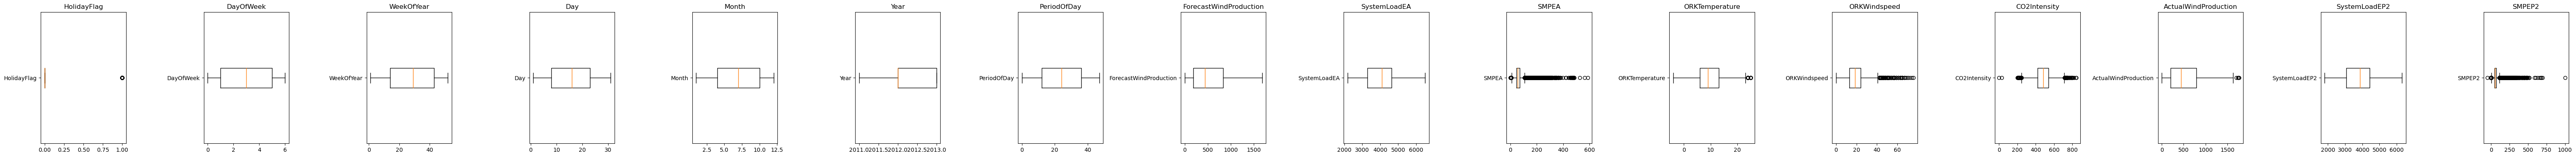

In [21]:
box_plot(df1)

outliers present in the following columns+

1. SMPEA: forecasted price
2. ORKTemperature: actual temperature measured
3. ORKWindspeed: actual windspeed measured
4. CO2Intensity: actual C02 intensity for the electricity produced
5. ActualWindProduction: actual wind energy production
6. SystemLoadEP2: actual national system load


check each column to understand the outliers


SMPEA: forecasted price

In [27]:
df1.SMPEA.describe()

count    37682.000000
mean        62.747428
std         32.300069
min          0.000000
25%         45.540000
50%         55.230000
75%         70.320000
max        587.580000
Name: SMPEA, dtype: float64

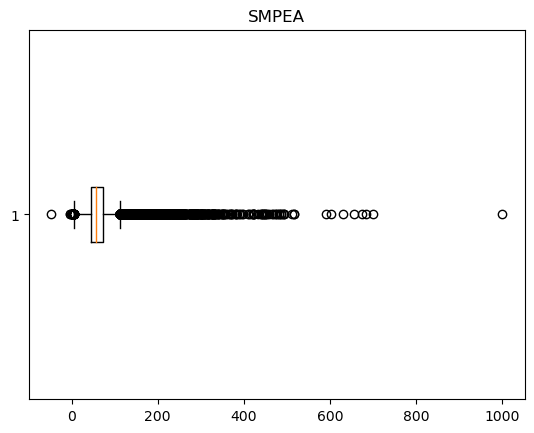

In [31]:
plt.boxplot(df1.SMPEP2, vert= False, whis= 1.5)
plt.title("SMPEA")
plt.show()

an assumption can be made about factors that led to extreme forcasted prices, hence no further action recommenended on the outliers

ORKTemperature: actual temperature measured

In [32]:
df1.ORKTemperature.describe()

count    37682.000000
mean         9.628443
std          4.439757
min         -4.000000
25%          6.000000
50%          9.000000
75%         13.000000
max         25.000000
Name: ORKTemperature, dtype: float64

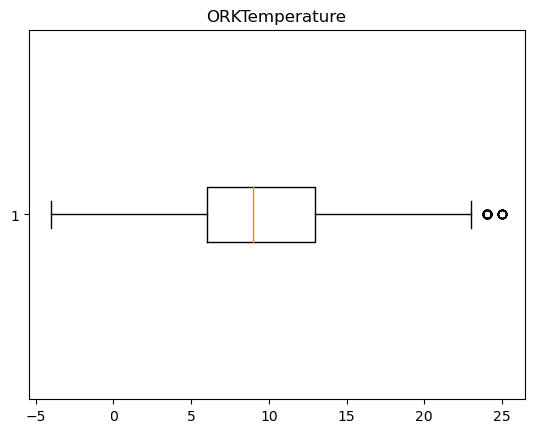

In [42]:
plt.boxplot(df1.ORKTemperature, vert= False, whis= 1.5)
plt.title("ORKTemperature")
plt.show()

two outliers present

In [43]:
# # identifying the two using the z score
# z = (df1.ORKTemperature - df1.ORKTemperature.mean()) / df1.ORKTemperature.std()
# out_rows = df1[abs(z) > 3]


assumption made and outliers left untouched

ORKWindspeed: actual windspeed measured

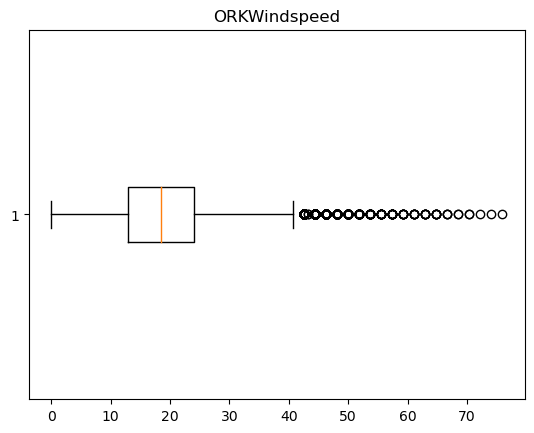

In [44]:
plt.boxplot(df1.ORKWindspeed, vert= False, whis= 1.5)
plt.title("ORKWindspeed")
plt.show()

CO2Intensity: actual C02 intensity for the electricity produced

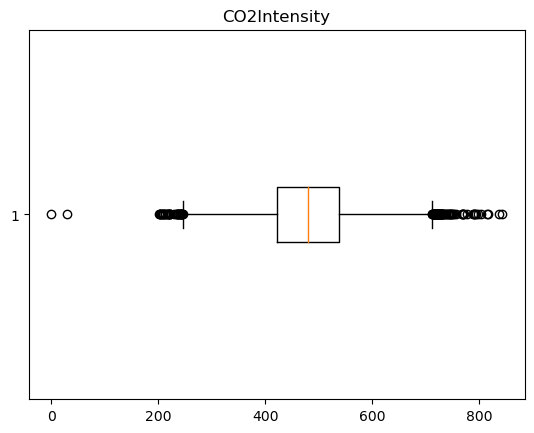

In [45]:
plt.boxplot(df1.CO2Intensity, vert= False, whis= 1.5)
plt.title("CO2Intensity")
plt.show()

only two extreme outliers

ActualWindProduction: actual wind energy production

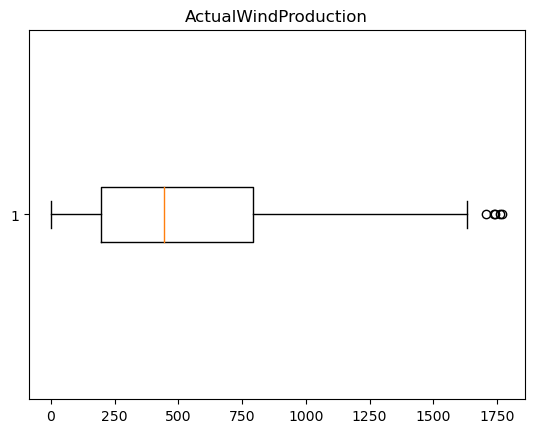

In [47]:
plt.boxplot(df1.ActualWindProduction, vert= False, whis= 1.5)
plt.title("ActualWindProduction")
plt.show()



we might be interested to view the relationship between Holiday flag and SMPEP2: the actual price of the electricity consumed

In [54]:
holiday = df1[df1.HolidayFlag == 1].SMPEP2
no_holiday = df1[df1.HolidayFlag == 0].SMPEP2

In [58]:
holiday.describe()

count    1416.000000
mean       63.851780
std        34.491958
min        18.400000
25%        43.960000
50%        55.420000
75%        73.330000
max       351.460000
Name: SMPEP2, dtype: float64

In [59]:
no_holiday.describe()

count    36266.000000
mean        64.194212
std         35.468875
min        -47.740000
25%         45.950000
50%         55.585000
75%         72.040000
max       1000.000000
Name: SMPEP2, dtype: float64

electricity on holidays is generally cheaper